In [1]:
import torch
import numpy as np
from easy_transformer import EasyTransformer, EasyTransformerConfig
import easy_transformer
import tqdm
import torch.nn.functional as F
import matplotlib.pyplot as plt
import random

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


cpu


In [2]:
vocab_size = 100
sequence_length = 10
batch_size = 100

tiny_cfg = EasyTransformerConfig(
    d_model=16,
    d_head=8,
    n_heads=4,
    d_mlp=16,
    n_layers=2,
    n_ctx=200,
    act_fn="solu_ln",
    d_vocab=vocab_size,
    normalization_type="LN",
    seed=0,
)
tiny_model = EasyTransformer(tiny_cfg).to(device)
cross_entropy_loss = torch.nn.CrossEntropyLoss()

Moving model to device:  cpu
Moving model to device:  cpu


In [3]:
from algorithmic_tasks.copy_perm import gen
eval_inputs, eval_outputs = gen(100,  tiny_model.cfg.d_vocab, 16)

In [4]:
print(eval_inputs[0])
print(eval_outputs[0])

tensor([17, 48, 79, 39, 11, 16, 24, 28, 52, 52, 90, 43, 44, 22, 11, 16, 90, 39,
        44, 52, 43, 11, 11, 16, 24, 28, 79, 48, 22, 17, 52])
tensor([99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 43, 11,
        22, 52, 44, 16, 16, 24, 28, 52, 39, 79, 11, 48, 90])


In [5]:
def get_loss(model, inputs, outputs):
    inputs = inputs.to(device)
    outputs = outputs.to(device)
    
    output_logits = model(inputs, return_type="logits")

    seq_len = inputs.shape[1]

    # ignore_mask = (outputs[:,:]!=(vocab_size-1)).reshape((-1,))
    
    # output_logits = output_logits[:,:].reshape((-1,vocab_size))*ignore_mask.reshape((-1,1))
    # #print(output_logits.shape, ignore_mask.shape)
    # output_logits[:,0] += 1-ignore_mask.reshape((-1)).long()
    # loss = cross_entropy_loss(
    #     output_logits,
    #     outputs[:,:].reshape((-1,))*ignore_mask)
    
    #print(torch.argmax(output_logits,dim=1))
    #print(outputs)
    loss = cross_entropy_loss(
        output_logits[:,seq_len//2+1:].reshape((-1,vocab_size)),
        outputs[:,seq_len//2+1:].reshape((-1,)))
    return loss

def evaluate_model(model, batch_size, print_output, number_to_print=0):
    vocab_size = model.cfg.d_vocab
    inputs,outputs = gen(batch_size,vocab_size,random.randrange(5,30))

    loss = get_loss(model,inputs,outputs)

    if print_output:
      eval_loss = get_loss(model,eval_inputs[:1], eval_outputs[:1])
      print(eval_loss.item())

    return loss

In [6]:
evaluate_model(tiny_model, batch_size=1, print_output=True, number_to_print=0)

5.076850891113281


tensor(4.8158, grad_fn=<NllLossBackward0>)

In [7]:
loss_history = []
print('Start training')
#tiny_model = torch.load("binary_xor_model")
tiny_optimizer = torch.optim.Adam(tiny_model.parameters(), lr=1e-3)
#loss = evaluate_model(tiny_model, batch_size=3000, print_output=True)
for epoch in tqdm.tqdm(range(3000000)):
    loss = evaluate_model(tiny_model, batch_size=batch_size, print_output=epoch % 100 == 0, number_to_print=0)
    loss.backward()
    loss_history.append(loss.item())
    tiny_optimizer.step()
    tiny_optimizer.zero_grad()

Start training


  0%|          | 0/3000000 [00:00<?, ?it/s]

5.076850891113281


  0%|          | 108/3000000 [00:02<18:11:08, 45.82it/s]

4.495480537414551


  0%|          | 205/3000000 [00:04<16:28:56, 50.56it/s]

4.388665676116943


  0%|          | 307/3000000 [00:06<20:27:10, 40.74it/s]

4.241305351257324


  0%|          | 409/3000000 [00:09<18:30:56, 45.00it/s]

4.064377784729004


  0%|          | 509/3000000 [00:11<18:45:56, 44.40it/s]

3.9918713569641113


  0%|          | 608/3000000 [00:13<19:50:24, 41.99it/s]

3.9085328578948975


  0%|          | 705/3000000 [00:15<17:56:00, 46.46it/s]

3.8234684467315674


  0%|          | 806/3000000 [00:18<17:13:31, 48.37it/s]

3.751607656478882


  0%|          | 908/3000000 [00:20<21:05:40, 39.49it/s]

3.7327206134796143


  0%|          | 1004/3000000 [00:22<20:34:15, 40.50it/s]

3.762789487838745


  0%|          | 1105/3000000 [00:25<22:08:11, 37.63it/s]

3.76487135887146


  0%|          | 1209/3000000 [00:27<16:56:26, 49.17it/s]

3.7446365356445312


  0%|          | 1307/3000000 [00:29<20:43:53, 40.18it/s]

3.7590620517730713


  0%|          | 1408/3000000 [00:31<17:59:24, 46.30it/s]

3.7653186321258545


  0%|          | 1508/3000000 [00:34<18:59:44, 43.85it/s]

3.7062580585479736


  0%|          | 1605/3000000 [00:36<22:55:45, 36.32it/s]

3.685741901397705


  0%|          | 1709/3000000 [00:39<18:34:25, 44.84it/s]

3.615950345993042


  0%|          | 1808/3000000 [00:41<20:16:47, 41.07it/s]

3.6020054817199707


  0%|          | 1907/3000000 [00:44<18:02:13, 46.17it/s]

3.508739471435547


  0%|          | 2009/3000000 [00:46<19:21:20, 43.03it/s]

3.4061152935028076


  0%|          | 2110/3000000 [00:48<17:38:38, 47.20it/s]

3.2456133365631104


  0%|          | 2206/3000000 [00:51<20:35:19, 40.45it/s]

2.642683506011963


  0%|          | 2309/3000000 [00:53<19:19:01, 43.11it/s]

1.9590771198272705


  0%|          | 2408/3000000 [00:55<16:18:21, 51.06it/s]

1.4488500356674194


  0%|          | 2507/3000000 [00:58<19:58:04, 41.70it/s]

1.0173012018203735


  0%|          | 2607/3000000 [01:00<20:42:36, 40.20it/s]

0.6218228936195374


  0%|          | 2706/3000000 [01:02<18:27:08, 45.12it/s]

0.3940993547439575


  0%|          | 2806/3000000 [01:05<18:05:02, 46.04it/s]

0.33368051052093506


  0%|          | 2910/3000000 [01:07<16:46:12, 49.64it/s]

0.35116952657699585


  0%|          | 3007/3000000 [01:09<19:27:08, 42.80it/s]

0.331470787525177


  0%|          | 3109/3000000 [01:11<18:50:05, 44.20it/s]

0.4049212634563446


  0%|          | 3207/3000000 [01:14<18:27:06, 45.11it/s]

0.3551751673221588


  0%|          | 3306/3000000 [01:16<19:08:23, 43.49it/s]

0.3259856402873993


  0%|          | 3405/3000000 [01:18<20:56:52, 39.74it/s]

0.368949830532074


  0%|          | 3503/3000000 [01:21<19:04:41, 43.63it/s]

0.33804935216903687


  0%|          | 3605/3000000 [01:23<18:22:21, 45.30it/s]

0.3958636522293091


  0%|          | 3710/3000000 [01:25<17:34:25, 47.36it/s]

0.383085697889328


  0%|          | 3805/3000000 [01:28<20:46:14, 40.07it/s]

0.39743906259536743


  0%|          | 3908/3000000 [01:30<18:02:34, 46.13it/s]

0.40246856212615967


  0%|          | 4009/3000000 [01:32<18:13:13, 45.68it/s]

0.4218386709690094


  0%|          | 4109/3000000 [01:34<17:35:02, 47.33it/s]

0.43570539355278015


  0%|          | 4205/3000000 [01:37<18:23:55, 45.23it/s]

0.3422580659389496


  0%|          | 4308/3000000 [01:39<18:22:56, 45.27it/s]

0.4362683594226837


  0%|          | 4408/3000000 [01:41<18:35:31, 44.76it/s]

0.354091078042984


  0%|          | 4508/3000000 [01:43<19:10:05, 43.41it/s]

0.3863411545753479


  0%|          | 4607/3000000 [01:46<20:33:14, 40.48it/s]

0.4358137547969818


  0%|          | 4706/3000000 [01:48<19:45:42, 42.10it/s]

0.4340660870075226


  0%|          | 4804/3000000 [01:50<18:05:24, 45.99it/s]

0.43289974331855774


  0%|          | 4908/3000000 [01:52<17:44:35, 46.89it/s]

0.43524083495140076


  0%|          | 5004/3000000 [01:55<19:54:57, 41.77it/s]

0.30740854144096375


  0%|          | 5107/3000000 [01:57<17:56:28, 46.37it/s]

0.3497964143753052


  0%|          | 5205/3000000 [01:59<16:21:20, 50.86it/s]

0.32192546129226685


  0%|          | 5307/3000000 [02:01<19:41:25, 42.25it/s]

0.349080353975296


  0%|          | 5409/3000000 [02:04<17:44:03, 46.91it/s]

0.42488524317741394


  0%|          | 5502/3000000 [02:06<18:36:05, 44.72it/s]

0.36767882108688354


  0%|          | 5608/3000000 [02:08<18:25:54, 45.13it/s]

0.40711572766304016


  0%|          | 5706/3000000 [02:10<19:42:47, 42.19it/s]

0.43521320819854736


  0%|          | 5805/3000000 [02:13<21:07:55, 39.36it/s]

0.41449472308158875


  0%|          | 5907/3000000 [02:15<18:57:30, 43.87it/s]

0.39058831334114075


  0%|          | 6008/3000000 [02:17<17:59:03, 46.24it/s]

0.37321656942367554


  0%|          | 6106/3000000 [02:19<16:42:23, 49.78it/s]

0.32411202788352966


  0%|          | 6206/3000000 [02:22<18:29:50, 44.96it/s]

0.3689570426940918


  0%|          | 6306/3000000 [02:24<20:25:56, 40.70it/s]

0.40982741117477417


  0%|          | 6406/3000000 [02:26<18:26:19, 45.10it/s]

0.36455515027046204


  0%|          | 6507/3000000 [02:28<17:54:45, 46.42it/s]

0.32082265615463257


  0%|          | 6608/3000000 [02:30<17:24:51, 47.75it/s]

0.3091927766799927


  0%|          | 6707/3000000 [02:32<16:10:26, 51.41it/s]

0.2829412817955017


  0%|          | 6805/3000000 [02:35<19:29:59, 42.64it/s]

0.37708619236946106


  0%|          | 6905/3000000 [02:37<19:44:41, 42.11it/s]

0.352143794298172


  0%|          | 7007/3000000 [02:39<18:02:44, 46.07it/s]

0.30617478489875793


  0%|          | 7105/3000000 [02:42<20:37:39, 40.30it/s]

0.3146172761917114


  0%|          | 7205/3000000 [02:44<18:33:14, 44.81it/s]

0.33936989307403564


  0%|          | 7310/3000000 [02:46<16:49:53, 49.39it/s]

0.30886900424957275


  0%|          | 7406/3000000 [02:49<18:53:47, 43.99it/s]

0.3504200279712677


  0%|          | 7507/3000000 [02:51<16:57:07, 49.03it/s]

0.33383482694625854


  0%|          | 7605/3000000 [02:53<17:21:26, 47.89it/s]

0.29029956459999084


  0%|          | 7704/3000000 [02:55<19:31:38, 42.57it/s]

0.27822354435920715


  0%|          | 7806/3000000 [02:58<19:54:30, 41.75it/s]

0.2814817428588867


  0%|          | 7907/3000000 [03:00<19:51:30, 41.85it/s]

0.2408575713634491


  0%|          | 8005/3000000 [03:02<19:06:53, 43.48it/s]

0.3286620080471039


  0%|          | 8105/3000000 [03:05<18:06:15, 45.91it/s]

0.2993411421775818


  0%|          | 8206/3000000 [03:07<17:42:27, 46.93it/s]

0.3311983346939087


  0%|          | 8308/3000000 [03:09<17:24:33, 47.73it/s]

0.3196293115615845


  0%|          | 8406/3000000 [03:11<20:25:15, 40.69it/s]

0.303812175989151


  0%|          | 8509/3000000 [03:13<16:38:58, 49.91it/s]

0.3229260742664337


  0%|          | 8606/3000000 [03:16<19:02:13, 43.65it/s]

0.25426623225212097


  0%|          | 8706/3000000 [03:18<18:58:36, 43.79it/s]

0.24143561720848083


  0%|          | 8808/3000000 [03:20<18:11:00, 45.69it/s]

0.2656785845756531


  0%|          | 8909/3000000 [03:22<17:46:33, 46.74it/s]

0.26588571071624756


  0%|          | 9006/3000000 [03:24<19:35:55, 42.39it/s]

0.28596776723861694


  0%|          | 9108/3000000 [03:27<19:02:31, 43.63it/s]

0.20717507600784302


  0%|          | 9203/3000000 [03:29<19:53:01, 41.78it/s]

0.28555089235305786


  0%|          | 9307/3000000 [03:31<19:02:26, 43.63it/s]

0.3088923394680023


  0%|          | 9405/3000000 [03:33<18:45:42, 44.28it/s]

0.28437626361846924


  0%|          | 9506/3000000 [03:36<19:52:44, 41.79it/s]

0.2865029573440552


  0%|          | 9589/3000000 [03:38<18:53:22, 43.97it/s]


KeyboardInterrupt: 

In [ ]:
#torch.save(tiny_model,"models/count_greater_than_x")

In [ ]:
print(len(loss_history))

1951


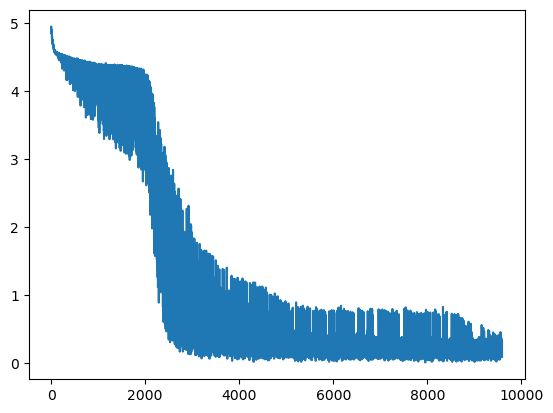

In [8]:
plt.plot(loss_history)

In [15]:
import pysvelte

def display_vectors(x,d=4):
    weights = torch.sum(x**3,dim=0)
    strongest = torch.argsort(weights)[-d:].flip(dims=(0,))
    plt.imshow(x.transpose(0,1)[strongest])
    plt.show()


def show_attention_pattern_for_input(model, inputs,outputs):
    model_cache={}
    model.cache_all(model_cache) # remove_batch_dim=True
    model(inputs)
    model.reset_hooks()
    
    pysvelte.AttentionMulti(tokens=[str(x) for x in inputs[0].tolist()], attention=model_cache['blocks.0.attn.hook_attn'][0].permute(1, 2, 0)).show()
    display_vectors(model_cache["blocks.0.mlp.hook_post"][0])
    
    pysvelte.AttentionMulti(tokens=[str(x) for x in inputs[0].tolist()], attention=model_cache['blocks.1.attn.hook_attn'][0].permute(1, 2, 0)).show()


In [16]:
inputs,outputs = gen(3,vocab_size,10)
output_logits = tiny_model(inputs, return_type="logits")
predictions = output_logits.argmax(dim=2)

[[66 36 18 86 48 19 24 76 17 64 19 86 48 24 18 17 76 36 66]
 [99 99 99 99 99 99 99 99 99 99 24 48 19 76 86 64 17 18 36]
 [68 36 36 86 18 86 18 19 24 24 24 48 19 76 86 64 17 18 36]]


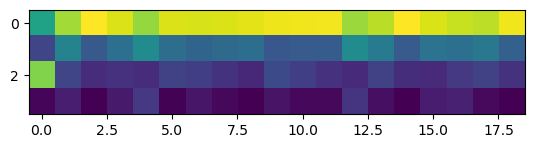

In [17]:
print(np.array([
    inputs[0].tolist(),
    outputs[0].tolist(),
    predictions[0].tolist()
  ]))
# print("\n".join([
#     "".join(str(x) for x in inputs[0][:len(inputs[0])//3].tolist()),
#     "".join(str(x) for x in inputs[0][len(inputs[0])//3+1:-len(inputs[0])//3].tolist()),
#     "".join(str(x) for x in inputs[0][-len(inputs[0])//3+1:].tolist()),
#     "".join(str(x) for x in predictions[0][-len(inputs[0])//3+1:].tolist()),
#     "".join(str(x) for x in outputs[0].tolist()),
#     "".join(str(x) for x in predictions[0].tolist()),
#   ]))
show_attention_pattern_for_input(tiny_model,inputs,outputs)

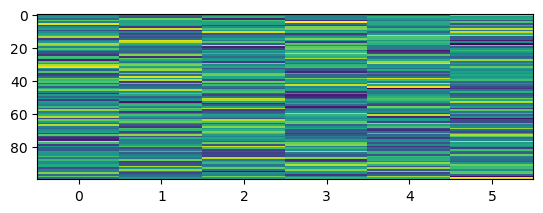

In [18]:
import matplotlib.pyplot as plt

embeds = tiny_model.embed.W_E.detach().cpu()
embeds = embeds[:,torch.argsort(embeds[0])]
plt.imshow(torch.pca_lowrank(embeds,center=True,q=6)[0],aspect=0.02)

In [ ]:
#model_cache={}
#tiny_model.cache_all(model_cache) # remove_batch_dim=True
inputs,outputs = gen(100,vocab_size,20)
output = tiny_model(inputs)
torch.mean(output**3).backward()
print((tiny_model.blocks[0].attn.z.grad.mean(dim=(0,1,3))))
#tiny_model.reset_hooks()

In [ ]:
print(model_cache["blocks.0.attn.hook_z"][0].shape)
print(model_cache["blocks.0.hook_attn_out"][0].shape)
print(model_cache["blocks.0.hook_attn_out"][0].shape)
print(model_cache["blocks.0.mlp.hook_pre"][0].shape)

In [ ]:
model_cache.keys()

In [ ]:
model_cache["blocks.0.attn.hook_z"].grad

In [ ]:
torch.tensor([2,3,4,5])>>2

In [ ]:
torch.arange(0,10,)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])